In [5]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import collections
import glob
import os
import statistics as s

In [6]:
def plot_hist(dic, str):
    fig, ax = plt.subplots(1,5, figsize = (30,6))
    fig.patch.set_facecolor('white')
    i = 0
    for key, value in d.items():
        numbers = value.iloc[:,0].to_numpy()
        occurrences = dict(collections.Counter(numbers))
        freq=[]
        for key, value in occurrences.items():
           freq.append(value)
        ax[i].hist(freq, bins = 150,density = True)
        ax[i].set_xlim([min(freq),65])
        ax[i].set_xlabel('Deegree')
        ax[i].set_ylabel('Probability density')
        ax[i].set_title('who_{}_who{}.txt'.format(str, i+1),fontsize = 14)
        print('Average node degree: {}'.format(s.mean(freq)))
        i = i + 1
    plt.savefig('who_{}_who_distribution.png'.format(str))
    plt.show()

In [7]:
def plot_loglog_hist(dic,str):
    fig, ax = plt.subplots(1,5, figsize = (30,6))
    fig.patch.set_facecolor('white')
    i = 0
    for key, value in d.items():
        numbers = value.iloc[:,0].to_numpy()
        occurrences = dict(collections.Counter(numbers))
        freq=[]
        for key, value in occurrences.items():
           freq.append(value)
        ax[i].hist(freq ,log = True, bins = np.logspace(start = np.log10(10),stop = np.log10(110)))
        ax[i].set_xscale("log")
        ax[i].set_title('Log-Log who_{}_who{}.txt'.format(str,i+1),fontsize = 14)
        i = i + 1
    plt.savefig('loglog_who_{}_who_distribution.png'.format(str))
    plt.show()

In [8]:
knows = []
for file in glob.glob('who_knows*'):
    knows.append(file)

d = {}
for file in knows:
    d[file] = pd.read_csv(file, delimiter = ' ')

Average node degree: 19.9799
Average node degree: 19.9799
Average node degree: 19.9799
Average node degree: 19.9799
Average node degree: 19.9799


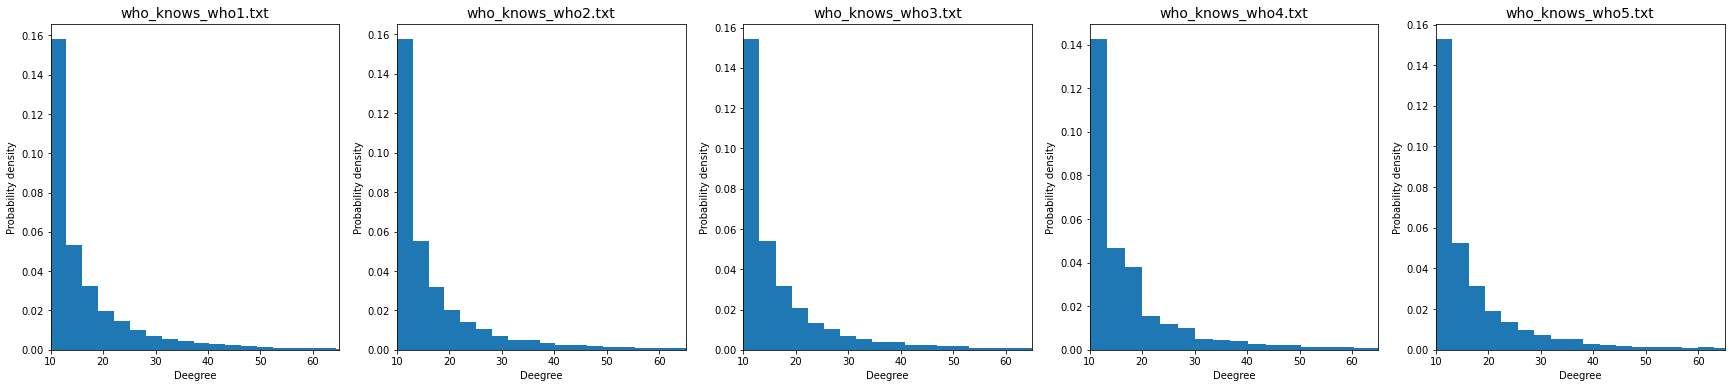

In [9]:
plot_hist(d, 'knows')

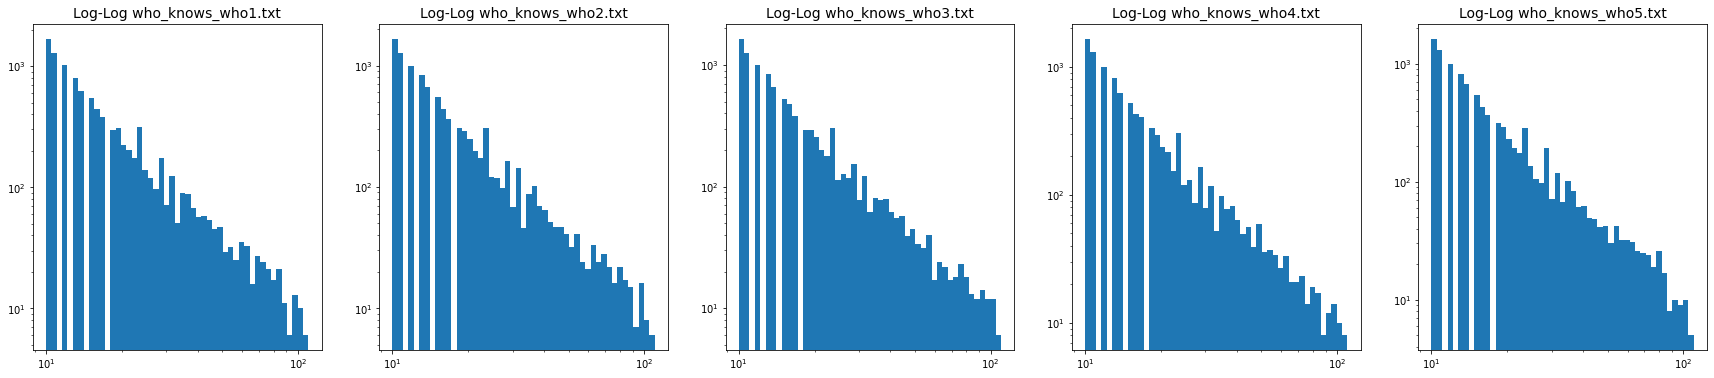

In [10]:
plot_loglog_hist(d,'knows')

In [11]:
meets = []
for file in glob.glob('who_meets*'):
    meets.append(file)

d = {}
for file in meets:
    d[file] = pd.read_csv(file, delimiter = ' ')

Average node degree: 19.9799
Average node degree: 19.9799
Average node degree: 19.9799
Average node degree: 19.9799
Average node degree: 19.9799


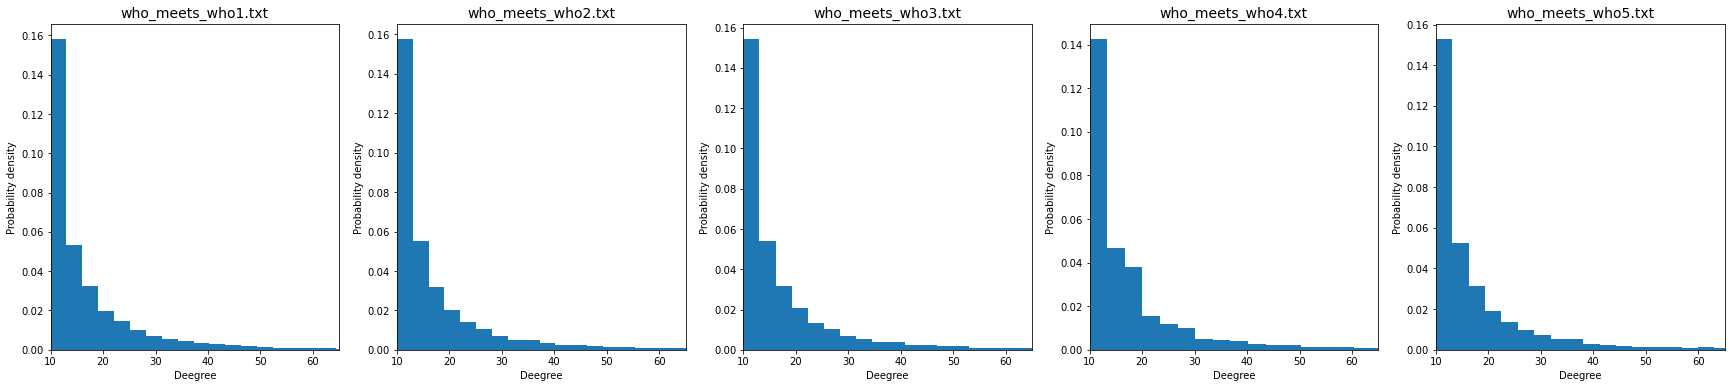

In [12]:
plot_hist(d, 'meets')

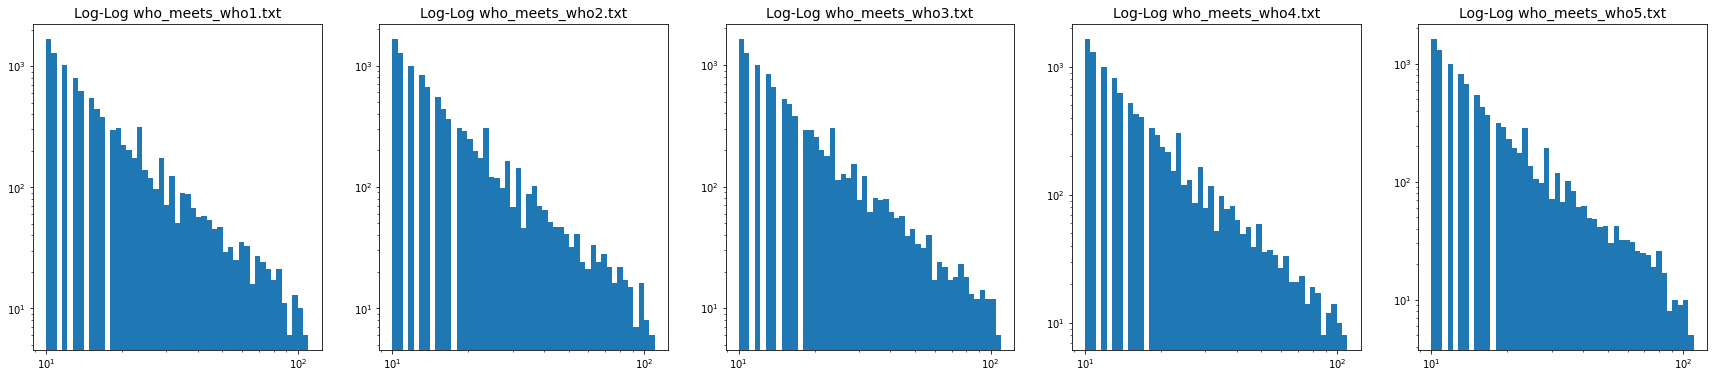

In [13]:
plot_loglog_hist(d,'meets')

## Wnioski:
Skonstruowano 5 par sieci BA (Who knows who oraz who meets who). Każdej parę sieci skonstruowano z użyciem innego seed'a. W analizowanym przypadku sieci zostały stworzone z parametrem $m = 10$. Zgodnie z teorią średni stopień wierzchołka w sieci B-A jest równy $2m$. W przypadku każdej powyższej sieci $\overline{k} = 19.9799 \approx 20 = 2m$, więc jest to pierwsza przesłanka na stwierdzenie poprawności algorytmu budującego sieć. Drugim argumentem jest, fakt, że w każdym przypadku stosunek dekad osi y do osi x na histogramie log - log znajduje się w przedziale $(2,3)$. Można więc śmiało stwierdzić, że zbudowane sieci są sieciami B-A